# Chapter 2: End to End ML Project

This a complete ML project to come up with the best model to predict housing values from a housing dataset in California.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")

In [4]:
df_housing = pd.read_csv(filepath)
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

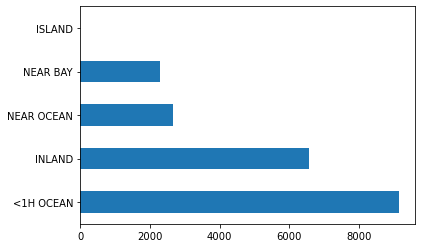

In [6]:
df_housing['ocean_proximity'].value_counts().plot(kind='barh')

In [7]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

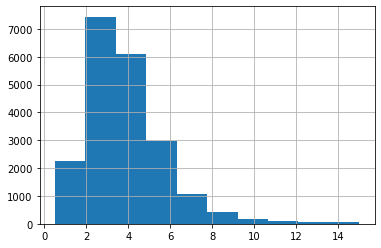

In [8]:
df_housing['median_income'].hist()

<AxesSubplot:>

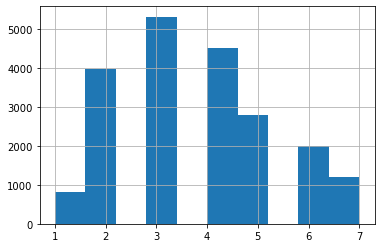

In [9]:
df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=[0.0, 1.5, 2.5, 3.5, 4.5, 5.5, 7.0, np.inf], 
                                                            labels=[1,2,3,4,5,6,7])
df_housing['income_cat'].hist()

In [10]:
y = df_housing['median_house_value']
X = df_housing.drop('median_house_value', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,7
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,7
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,7
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,6
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


## Split Datasets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<AxesSubplot:>

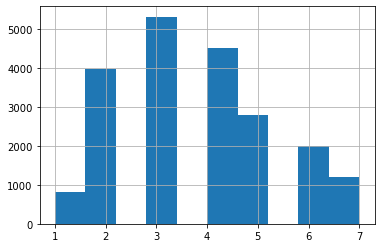

In [12]:
df_housing['income_cat'].hist()

Splitting the data into training and testing data may result in uneven splitting with respect to a variable. In this case this does not happen. But in general to make sure training and testing data is split evenly we will use `Stratified Split`.  

<AxesSubplot:>

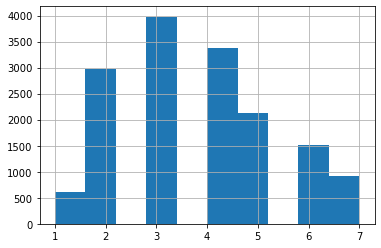

In [13]:
X_train['income_cat'].hist()

### Stratified Split

Stratified ShuffleSplit cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=33)
for train_index, test_index, in split.split(df_housing, df_housing['income_cat']):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

`StratifiedShuffleSplit` makes sure the distribution of data-points in `income_cat` is same for training and testing set. Let us compare `StratifiedShuffleSplit` and `train_test_split` by looking at the respective proportions.

In [15]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.257752
4    0.218798
2    0.193023
5    0.135659
6    0.096899
7    0.058140
1    0.039729
Name: income_cat, dtype: float64

In [16]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.257623
4    0.218798
2    0.192959
5    0.135724
6    0.096964
7    0.058075
1    0.039858
Name: income_cat, dtype: float64

In [17]:
def income_cat_props(data):
    return data['income_cat'].value_counts()/len(data)

train_set , test_set = train_test_split(df_housing, test_size=0.25, random_state=33)

compare_props = pd.DataFrame({ "Overall" : income_cat_props(df_housing),
                                "Random" : income_cat_props(test_set),
                                "Stratified" : income_cat_props(strat_test_set)}).sort_index()

compare_props["% error (Random)"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["% error (Stratified)"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Random,Stratified,% error (Random),% error (Stratified)
1,0.039826,0.039729,0.039729,-0.243309,-2.433090e-01
2,0.192975,0.187597,0.193023,-2.786844,2.510670e-02
3,0.257655,0.261240,0.257752,1.391501,3.760812e-02
4,0.218798,0.219186,0.218798,0.177148,-1.421085e-14
5,0.135707,0.128682,0.135659,-5.176723,-3.570154e-02
6,0.096948,0.099225,0.096899,2.348826,-4.997501e-02
7,0.058091,0.064341,0.058140,10.758966,8.340284e-02


In [18]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

## Visualizing the Data

In [19]:
housing = strat_train_set.copy()

### Histogram

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

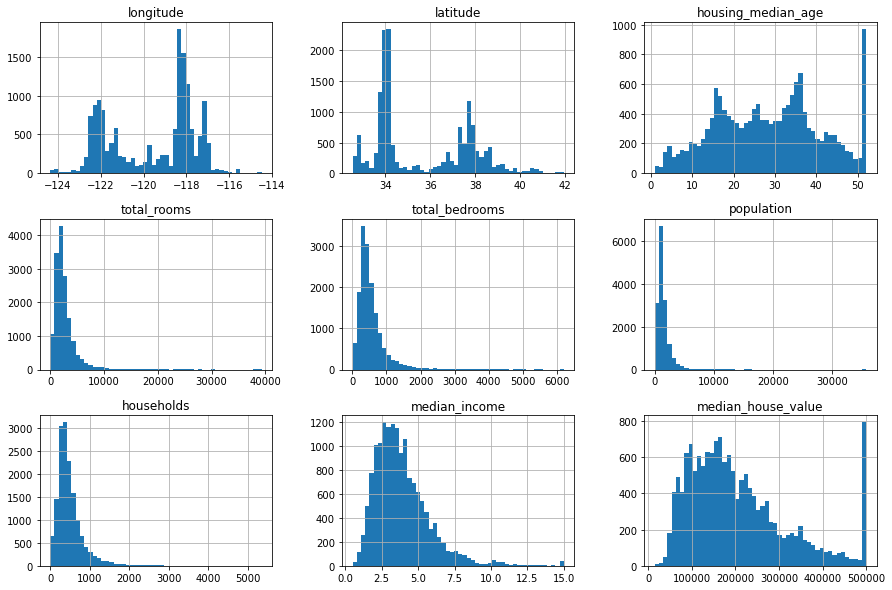

In [20]:
housing.hist(bins=50, figsize = (15,10))

### Geographic Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

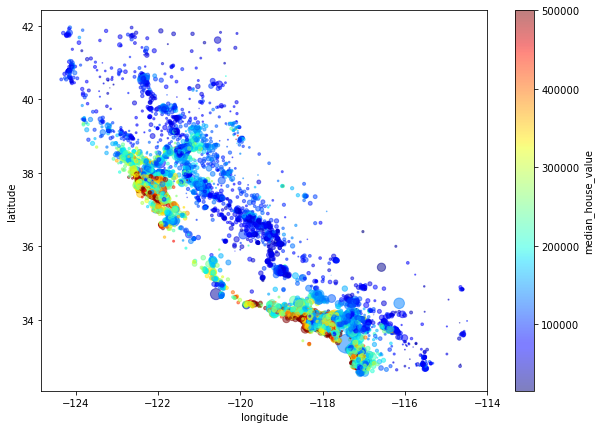

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.5, s = housing['population']/100, c = 'median_house_value', 
                figsize = (10,7), cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)

## Corelation Matrices

In [22]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924335,-0.112605,0.039342,0.063952,0.096427,0.049278,-0.011613,-0.041028
latitude,-0.924335,1.000000,0.013473,-0.032099,-0.062433,-0.106312,-0.066216,-0.084217,-0.148500
housing_median_age,-0.112605,0.013473,1.000000,-0.360735,-0.320840,-0.296504,-0.302412,-0.111401,0.109920
total_rooms,0.039342,-0.032099,-0.360735,1.000000,0.930559,0.856868,0.919547,0.198764,0.135010
total_bedrooms,0.063952,-0.062433,-0.320840,0.930559,1.000000,0.877686,0.980532,-0.005923,0.051243
population,0.096427,-0.106312,-0.296504,0.856868,0.877686,1.000000,0.905634,0.004544,-0.025091
households,0.049278,-0.066216,-0.302412,0.919547,0.980532,0.905634,1.000000,0.014554,0.068398
median_income,-0.011613,-0.084217,-0.111401,0.198764,-0.005923,0.004544,0.014554,1.000000,0.688738
median_house_value,-0.041028,-0.148500,0.109920,0.135010,0.051243,-0.025091,0.068398,0.688738,1.000000


<AxesSubplot:>

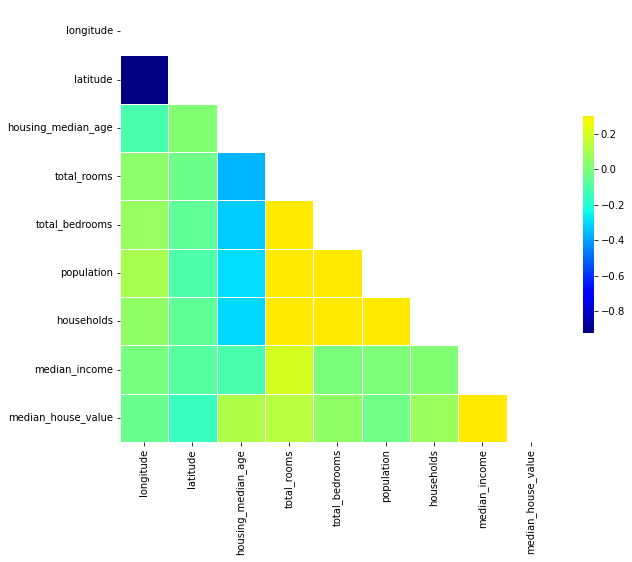

In [26]:
import seaborn as sns

corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  #returns an upper triangular matrix (np array) with ones

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap='jet', vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":.5})

## Preparing Data for ML

Data preparation is often the most time-consuming step of the modeling process. It is also one of the most important with model accuracy often contingent on the quality of data inserted. To this end, we will be applying the following transformations on this data: 

- **Imputation:** Inserting values where they might be missing
- **Encoding:** Transforming categorical variables into some numerical variables
- **Feature Engineering:** Creating new features (columns) out of our raw data using domain knowledge
- **Scaling:** Applying a scaler that transforms all of our data on the same numerical scale 

In [34]:
housing_features = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Imputation

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [36]:
housing_num = housing_features.select_dtypes(include=np.number) #selects only the columns that have numerical entries (int, float, etc.)
imputer.fit(housing_num)                                   

SimpleImputer(strategy='median')

In [37]:
X = imputer.transform(housing_num)       #returns an array, so need to convert to df again

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
18318,-122.11,37.44,35.0,2016.0,349.0,1023.0,376.0,5.6413
15219,-117.12,32.95,4.0,9018.0,1572.0,4438.0,1498.0,4.9880
19890,-119.15,36.29,18.0,1435.0,438.0,657.0,254.0,2.4281
19417,-121.14,37.70,29.0,1343.0,223.0,751.0,225.0,3.2391
4366,-118.27,34.10,51.0,3149.0,519.0,1082.0,510.0,6.4459


### Encoding

There are multiple ways we can encode a categorical variable. For instance we can assign a numerical value to each category. But this might make the ML algorithm choose one outcome more than others. So, we replace the categorical variable by an array of length the number of entries in the categorical variable column. The array has all zeros except one at one place corresponding to the value of the categorical variable. 

In [45]:
housing_cat = np.array(housing_features['ocean_proximity'])
housing_cat = housing_cat.reshape(-1,1)                          #we needed to reshape the array to a 2D array for the encoder to work.

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### Feature Engineering

In [49]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
    data["population_per_household"] = data["population"]/data["households"]
    data["rooms_per_household"] = data["total_rooms"]/data["households"]

    return data

In [51]:
housing_feature_engineered = feature_engineering(housing_tr)
housing_feature_engineered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
18318,-122.11,37.44,35.0,2016.0,349.0,1023.0,376.0,5.6413,0.928191,2.720745,5.361702
15219,-117.12,32.95,4.0,9018.0,1572.0,4438.0,1498.0,4.9880,1.049399,2.962617,6.020027
19890,-119.15,36.29,18.0,1435.0,438.0,657.0,254.0,2.4281,1.724409,2.586614,5.649606
19417,-121.14,37.70,29.0,1343.0,223.0,751.0,225.0,3.2391,0.991111,3.337778,5.968889
4366,-118.27,34.10,51.0,3149.0,519.0,1082.0,510.0,6.4459,1.017647,2.121569,6.174510


### Scaling

Many ML algorithms don't work well with unscaled data. The magnitude of values in a particular can be misleading. Because of this we will scale our values using the StandardScaler which will scale the values to their z-score within their column like so:

$$z = \frac{x-u}{\sigma}$$

where $x$ is the value, $u$ is the mean and $\sigma$ is the standard deviation.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.27068036,  0.84987039,  0.50736697, ..., -0.31570524,
        -0.03231712, -0.02942666],
       [ 1.2195692 , -1.25389062, -1.96881212, ..., -0.09847599,
        -0.01211278,  0.22233972],
       [ 0.20650175,  0.31104519, -0.85053769, ...,  1.11128184,
        -0.04352146,  0.08067798],
       ...,
       [-1.34553756,  1.06540048,  1.86527163, ..., -0.24301601,
        -0.0551073 ,  0.47893279],
       [ 0.9700452 , -0.75254891, -1.5694284 , ..., -0.19309515,
         0.06376462,  0.6893158 ],
       [ 0.62570207, -0.71506542,  0.42749022, ..., -0.09338682,
         0.04088048, -0.94118627]])

### Pipeline

We combine all four process into one single `data_transformation` function.

In [64]:
def data_transformation(data):

    ## separate labels if they exist ##
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels = None

    ## Feature Engineering ##
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)

    ## Imputing Data ##
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ## Encoding Categorical Data ##

    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    ##housing_cat = housing_cat.reshape(-1,1)
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + list(cat_encoder.categories_[0])
    features.remove("ocean_proximity")

    ## Scaling Data ##

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    housing_scaled = scaler.fit_transform(imputed)

    ## Concatening all Data ##
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features  

## Select and Train a Model

We need to create a clean training dataset to "train" our ML regressors, and a "test" set to test the accuracy of said regressors.

In [84]:
train_data, train_labels, train_features = data_transformation(strat_train_set)

In [85]:
test_data, test_labels, test_features = data_transformation(strat_test_set)

In [86]:
print(train_features)
print(test_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedrooms_per_household', 'population_per_household', 'rooms_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedrooms_per_household', 'population_per_household', 'rooms_per_household', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']


In [87]:
train_data = np.delete(train_data, 13, 1)
train_features.remove("ISLAND")

### Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [93]:
#Compare against some Test Data

original_values = test_labels

predicted_values = lin_reg.predict(test_data)

df_compare = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

df_compare["Differences"] = df_compare["Original Values"] - df_compare["Predicted Values"]

df_compare.head()

,Original Values,Predicted Values,Differences
330,82400.0,175137.466697,-92737.466697
10685,161800.0,283132.388203,-121332.388203
369,126300.0,227449.614006,-101149.614006
5837,192400.0,195081.622580,-2681.622580
8555,345800.0,306083.149353,39716.850647


In [94]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67412.20857676704

In [95]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

49114.20343405829

### Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=33)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=33)

In [108]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation

Instead of splitting our data into a train and test set and training once, we can do something called a *K-Fold Cross-Validation* which will split our training dataset into 10 folds training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model

In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [102]:
print("Scores:")
print(tree_rmse_scores)

Scores:
[69208.83141554 69659.92548555 69238.76482646 72076.81172304
 72853.97144524 70163.6229885  75452.23605709 68721.62654473
 72704.86037675 70656.39278134]


### Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=33)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=33)

In [109]:
forest_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, forest_predictions)

forest_rmse = np.sqrt(forest_mse)
forest_rmse

18862.943207257442

In [110]:
forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [111]:
forest_rmse_scores

array([49583.30509175, 50368.826332  , 51049.74511449, 52358.36647381,
       52308.72508516, 47552.01430534, 50923.93123001, 50659.01839088,
       51379.48165124, 50166.94876017])

## Fine-Tuning the Model

After picking a model or set of models that are promising, we'll need to fine-tune the hyperparameters (parameters that aren't affected by training) in order to find the best ones to use for the model. We can use `Grid Search` for this. 

### Grid Search

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2*3) combination with bootstrap set as False
    {'bootstrap':[False], 'n_estimators': [3,10], 'max_features': [2,4,6]}
]

forest_reg = RandomForestRegressor(random_state=33)
#train across 5 folds, thats a total of (12+6)*5=90 rounds of training

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=33),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [114]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=33)

In [115]:
# Cross-Validation
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63606.49820036065 {'max_features': 2, 'n_estimators': 3}
55370.284331512616 {'max_features': 2, 'n_estimators': 10}
52916.82589552388 {'max_features': 2, 'n_estimators': 30}
59751.61777697023 {'max_features': 4, 'n_estimators': 3}
52434.23534871921 {'max_features': 4, 'n_estimators': 10}
50323.154449223846 {'max_features': 4, 'n_estimators': 30}
58941.59068990037 {'max_features': 6, 'n_estimators': 3}
51945.20706478459 {'max_features': 6, 'n_estimators': 10}
50008.29864849059 {'max_features': 6, 'n_estimators': 30}
59077.18668157043 {'max_features': 8, 'n_estimators': 3}
52355.580920360204 {'max_features': 8, 'n_estimators': 10}
50415.84148783764 {'max_features': 8, 'n_estimators': 30}
62043.07328839486 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54232.874267403175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
56676.063328380515 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51209.39534692517 {'bootstrap': False, 'max_features': 4, 'n_estimators

In [117]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191217,0.051785,0.011001,0.002449,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.978911e+09,-4.156307e+09,...,-4.045787e+09,1.841437e+08,18,-1.163220e+09,-1.085596e+09,-1.116596e+09,-1.128897e+09,-1.052073e+09,-1.109276e+09,3.789838e+07
1,0.492409,0.036135,0.023223,0.004777,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.948925e+09,-3.155794e+09,...,-3.065868e+09,9.241808e+07,11,-6.072273e+08,-5.928923e+08,-5.798419e+08,-5.725821e+08,-5.951777e+08,-5.895443e+08,1.214483e+07
2,1.132055,0.084908,0.045915,0.004072,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.718804e+09,-2.862540e+09,...,-2.800190e+09,6.406475e+07,9,-4.452099e+08,-4.342153e+08,-4.372226e+08,-4.218954e+08,-4.334064e+08,-4.343899e+08,7.512745e+06
3,0.160616,0.008544,0.006187,0.001476,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.469800e+09,-3.509977e+09,...,-3.570256e+09,8.061368e+07,16,-9.663922e+08,-9.904968e+08,-9.744632e+08,-9.541239e+08,-9.639491e+08,-9.698850e+08,1.217909e+07
4,0.964503,0.504670,0.024305,0.003080,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.735725e+09,-2.817326e+09,...,-2.749349e+09,5.618628e+07,8,-5.233195e+08,-5.257247e+08,-5.227373e+08,-5.178505e+08,-5.129479e+08,-5.205160e+08,4.567380e+06


### Randomized Search

`Randomized Search` allows us to more easily find the hyperparameters that we are interested in as it only picks a few combinations instead of all.

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_dist = {'n_estimators': randint(low=1, high=100), 'max_features': randint(low=1, high=8)}

forest_reg = RandomForestRegressor(random_state=33)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=params_dist, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=33)

rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=33),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001925D37BB50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001925D378DC0>},
                   random_state=33, scoring='neg_mean_squared_error')

In [120]:
# Cross-Validation
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

52854.94264121045 {'max_features': 5, 'n_estimators': 8}
55025.85988294398 {'max_features': 1, 'n_estimators': 67}
50144.37911921403 {'max_features': 3, 'n_estimators': 74}
51933.708529757525 {'max_features': 2, 'n_estimators': 68}
49551.46844663286 {'max_features': 7, 'n_estimators': 62}
51300.400615231 {'max_features': 4, 'n_estimators': 15}
49464.08586048512 {'max_features': 5, 'n_estimators': 43}
49941.10876697114 {'max_features': 6, 'n_estimators': 36}
51858.172505145194 {'max_features': 2, 'n_estimators': 78}
51691.27941176047 {'max_features': 5, 'n_estimators': 13}


In [123]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.07854406, 0.07755094, 0.04055565, 0.01964743, 0.01895819,
       0.01957895, 0.01775273, 0.33013265, 0.02643325, 0.10829186,
       0.09639477, 0.0203942 , 0.134115  , 0.00618586, 0.00546447])

### Feature Importance List

In [129]:
feature_importances_dict = dict(zip(train_features, list(feature_importances)))
feature_importances_dict

{'longitude': 0.07854405549008579,
 'latitude': 0.07755093820643545,
 'housing_median_age': 0.040555646823902995,
 'total_rooms': 0.019647434514936717,
 'total_bedrooms': 0.01895818736961219,
 'population': 0.01957895040611974,
 'households': 0.01775273029027066,
 'median_income': 0.330132646054484,
 'bedrooms_per_household': 0.026433249518401588,
 'population_per_household': 0.1082918564944231,
 'rooms_per_household': 0.0963947669657151,
 '<1H OCEAN': 0.020394198067883156,
 'INLAND': 0.13411500271942783,
 'NEAR BAY': 0.006185862862739812,
 'NEAR OCEAN': 0.005464474215562024}

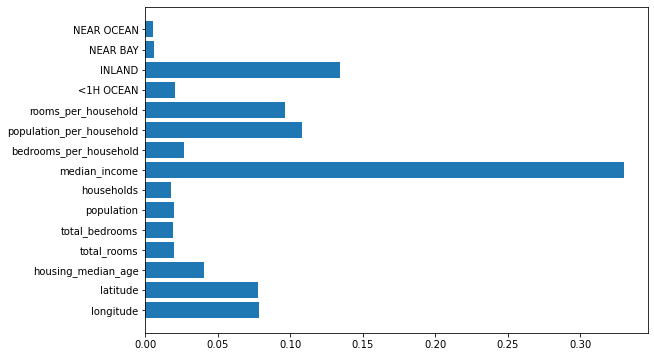

In [134]:
fig, ax = plt.subplots(figsize=(9,6))
plt.barh(y= list(feature_importances_dict.keys()), width=list(feature_importances_list.values()))
plt.show()

In [135]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [136]:
final_rmse

62566.75792156164